# Assignment: Spam Classification

## Task: Detect Spam in SMS messages   

Kaggle challenge: https://www.kaggle.com/uciml/sms-spam-collection-dataset

### Problem description
**Context**
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Data
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet.



# Task 1: Problem Statement
Discuss the problem setting and the first implecations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

**Assumptions**
* The categorization (v1) is correct
* text data has to be transformed int a vector

**Problems**
* text data has to be transformed into a vector

# Task 2: First Data Analysis and Cleaning
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('spam.csv' , encoding = "ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


drop unnamed 2-4? few values

In [6]:
data["v1"].unique()

array(['ham', 'spam'], dtype=object)

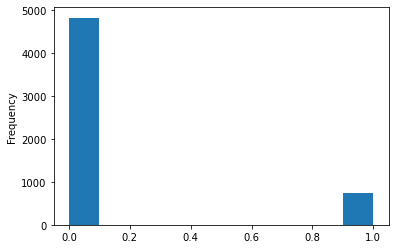

In [7]:
#create Label set all 0 and change the spam to 1
data["Label"] = 0
data.loc[ data["v1"] == "spam", "Label"] = 1
data["Label"].plot(kind = "hist")

In [8]:
#strip empty strings
data[ data["v2"].str.strip() == ""]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Label


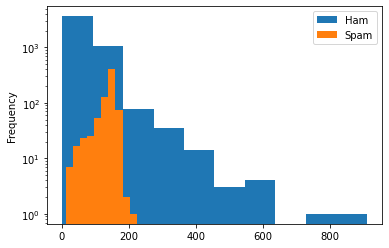

In [9]:
data[ data["Label"] == 0]["v2"].str.len().plot(kind = "hist", label = "Ham", log=True)
data[ data["Label"] == 1]["v2"].str.len().plot(kind = "hist", label = "Spam", log= True)
plt.legend()

In [10]:
#only use the data from v2 and Label
labels = data["Label"]
features = data["v2"]

# Task 3: Feature Extraction
## Hint : see lecture of week 6
* How can we handle text?
* Discuss possible features for a numerical repressentation!
* How can we obtain a compact and non-sparse representation?

See: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [12]:
vector = CountVectorizer()

X = vector.fit_transform(features).toarray()
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 4: Train a Random Forrest Model
* Train and evaluate the model using the approach from task 3
* Diskuss the results -> possible improovements?
* Use RF feature importance to see which features are driving the RF Decission

See: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [13]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=1, n_jobs=4)
model.fit(X_train, y_train) #samlpe_weight
predict = model.predict(X_test)

In [ ]:
print (classification_report(y_test, predict))

In [ ]:
feature_importance = model.feature_importances_
f_names = np.array(vector.get_feature_names())
df = pd.DataFrame(list(zip(f_names, feature_importance)), columns = ["name", "importance"])
df.head()

In [ ]:
df.sort_values(by= "importance", ascending = False, inplace = True)
df.head(10)

In [ ]:
df.tail(10)

## Possible improvements #
* use different parameters for the random forest (RandomizedSearchCV)
* optimize parameters
* maybe strip special characters for pure text analysis
